In [74]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
#total rows and columns in dataset
df.shape

(32561, 15)

In [9]:
#cleaning string in object columns
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = df[i].str.strip()

In [10]:
#encoding salary column
df['salary']=df['salary'].replace('<=50K',0)
df['salary']=df['salary'].replace('>50K',1)

In [11]:
#people whose earning less than 50K
df[df['salary']==0].shape

(24720, 15)

In [12]:
#people whose earning more than 50K
df[df['salary']==1].shape

(7841, 15)

In [13]:
#cleaning rows
l=[]
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j]=='?':
            l.append(j)
df.drop(index=l,inplace=True)
print(len(l))

4262


In [14]:
#no null value in dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [15]:
#doing private job and salary more than 50K
new_df=df[df['workclass']=='Private']
print(len(new_df[new_df['salary']==1]))
new_df[new_df['salary']==1].head(2)

4876


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


- so there is 4876 people are doing job in private class and earn more than 50K

<AxesSubplot:xlabel='salary'>

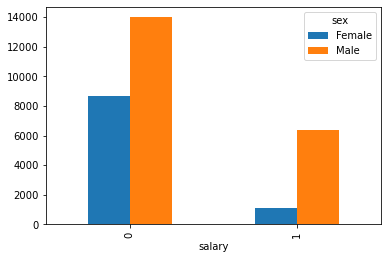

In [16]:
#cheacking male and female ration according to their salary
class_sex = pd.crosstab(df['salary'],df['sex'])
class_sex.plot(kind='bar')

In [17]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [18]:
#how many of people whose age above avarge earn more than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['salary']==1]))
avg_age[avg_age['salary']==1].head(2)

5042


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


- so there is '5042' people whose age is greater than average age earning more than 50K

In [19]:
#how many of people whose age above avarge earn more than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['salary']==0]))
avg_age[avg_age['salary']==0].head(2)

8911


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


- so there is '8911' people whose age is greater than average age earning less than 50K

<AxesSubplot:xlabel='salary'>

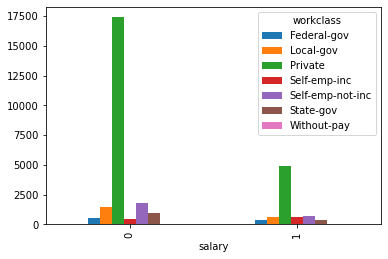

In [20]:
#cheacking distribution of people in workclass according to salary
class_salary = pd.crosstab(df['salary'],df['workclass'])
class_salary.plot(kind='bar')

- so we can clearly see that private class people is more than other classes in both type of category of salary

<AxesSubplot:xlabel='education'>

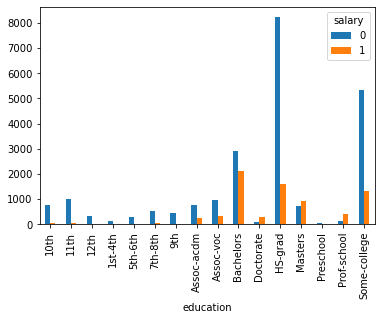

In [21]:
#cheacking distribution of people according to salary
salary_education = pd.crosstab(df['education'],df['salary'])
salary_education.plot(kind='bar')

In [22]:
#numeric columns
num_col=[]
for i in df.columns:
    if df[i].dtype=='int64':
        num_col.append(i)

        
num_col = num_col[0:6]
num_col 

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

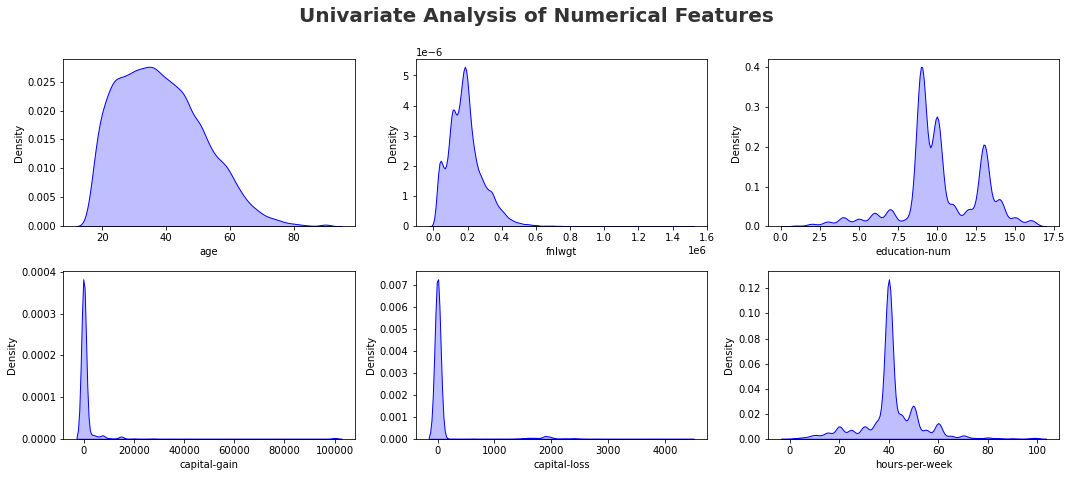

In [23]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [24]:
#categorical columns
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
        
cat_col        

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country']

<Figure size 432x288 with 0 Axes>

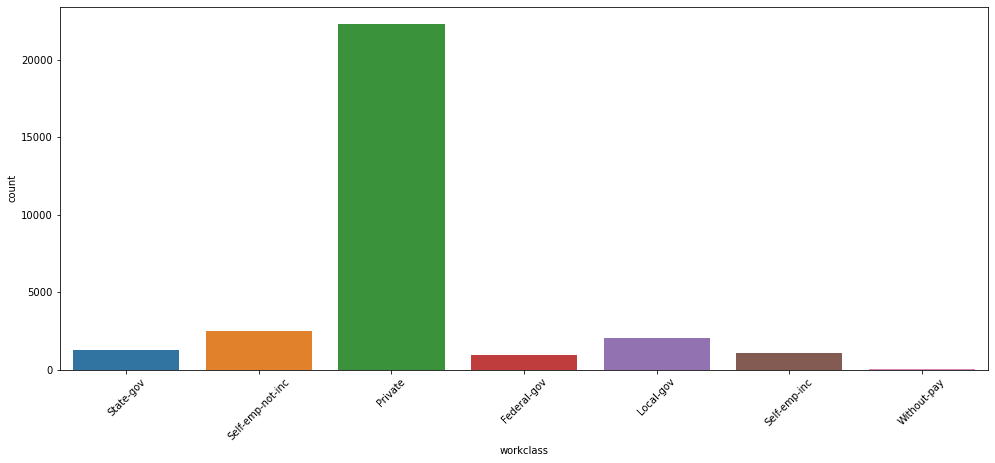

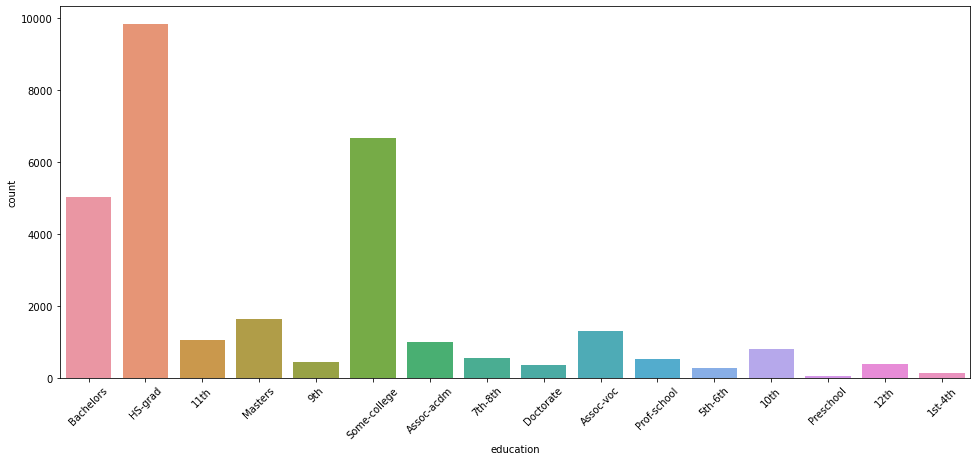

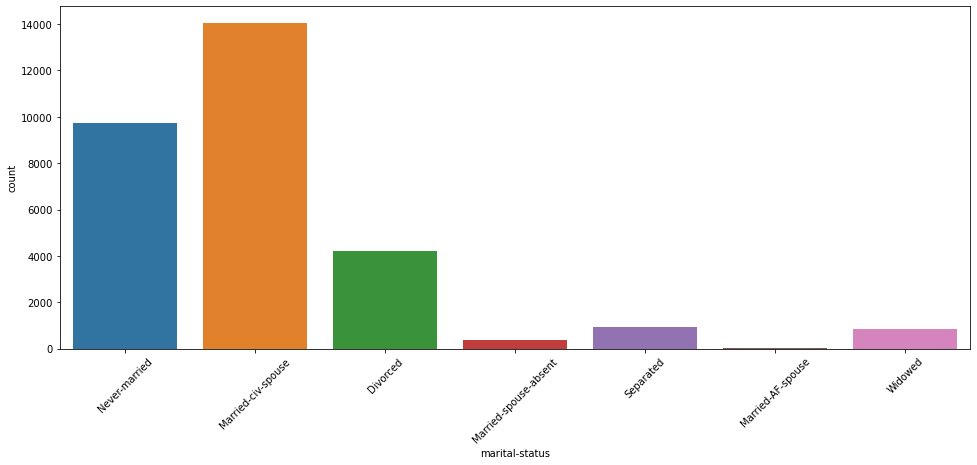

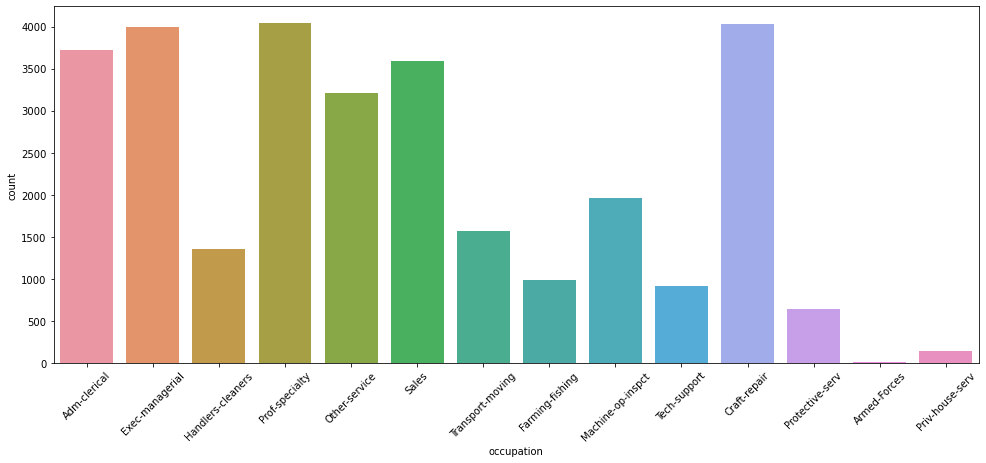

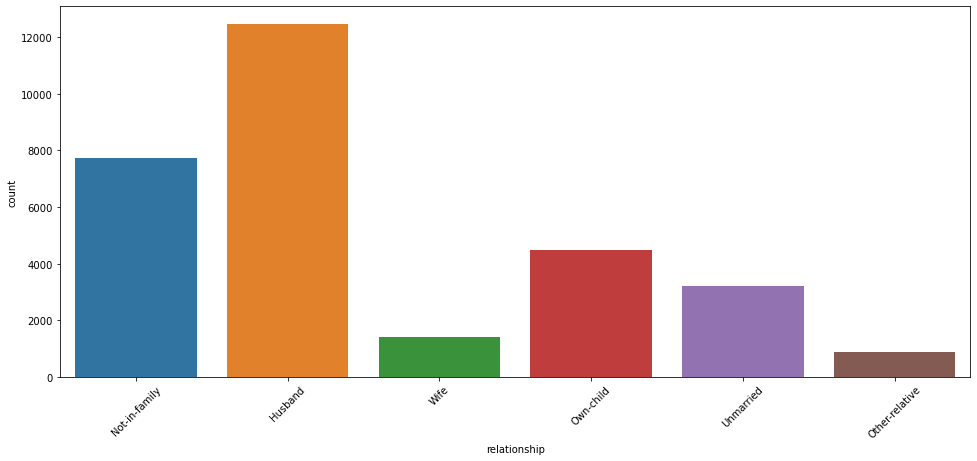

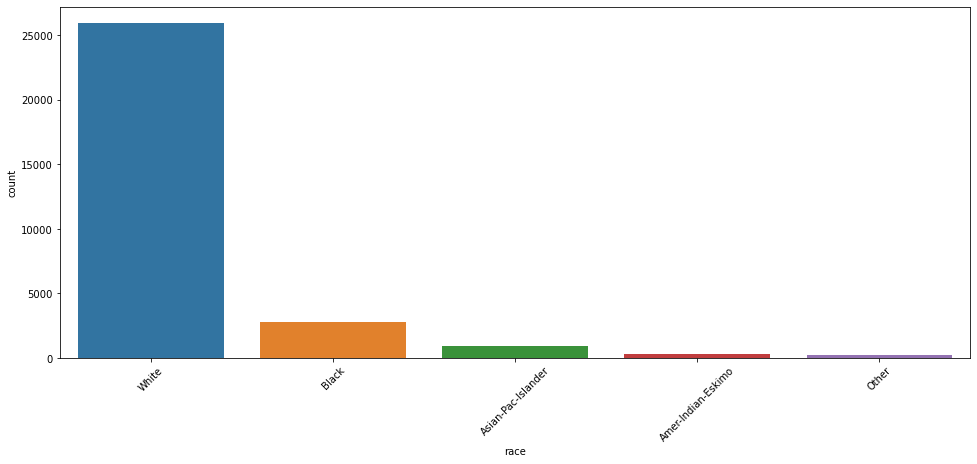

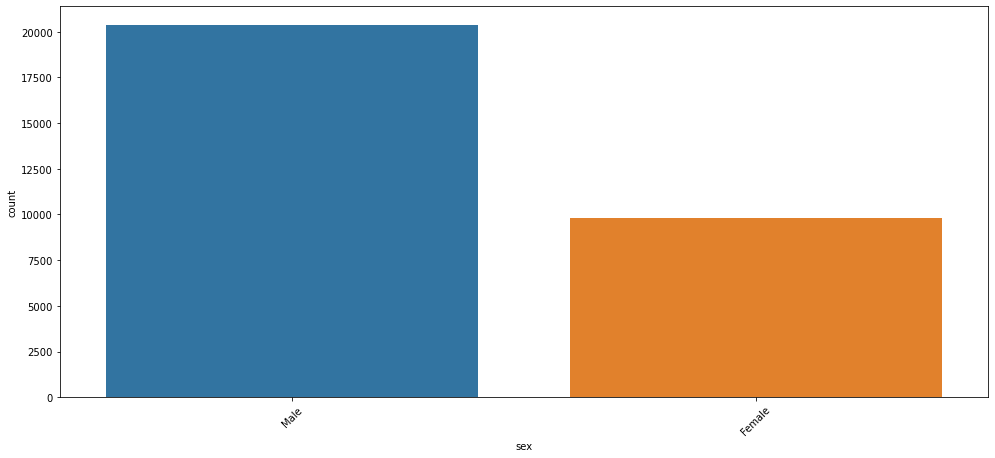

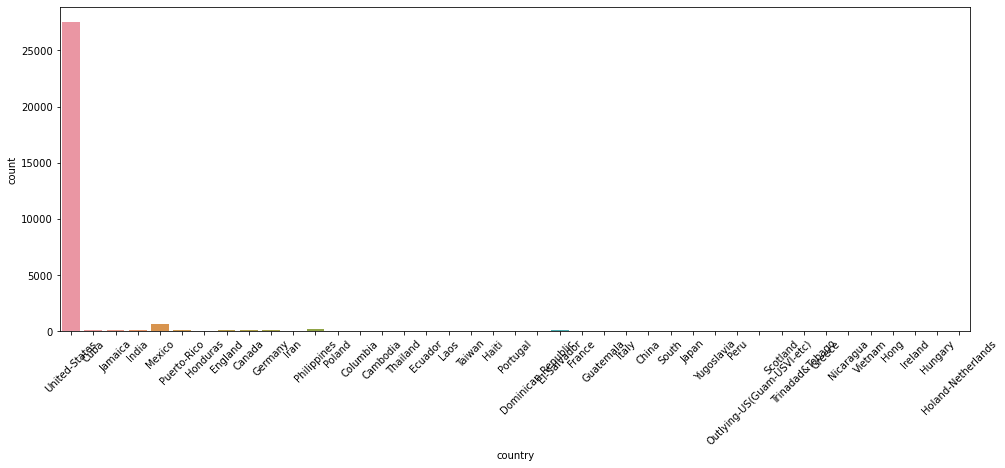

In [25]:
# categorical columns
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Check Multicollinearity in Numerical features¶

In [26]:
df[(list(df.columns)[1:])].corr()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
fnlwgt,1.000000,-0.044992,0.000422,-0.009750,-0.022886,-0.008957
education-num,-0.044992,1.000000,0.124416,0.079646,0.152522,0.335286
capital-gain,0.000422,0.124416,1.000000,-0.032229,0.080432,0.221196
capital-loss,-0.009750,0.079646,-0.032229,1.000000,0.052417,0.150053
hours-per-week,-0.022886,0.152522,0.080432,0.052417,1.000000,0.229480
salary,-0.008957,0.335286,0.221196,0.150053,0.229480,1.000000


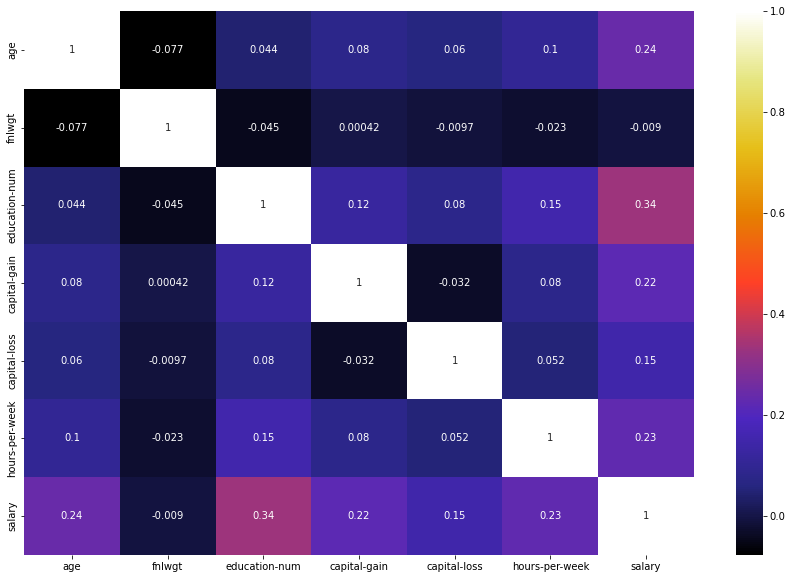

In [27]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

- so their is no multicollinearity in numeric feature

# Check Multicollinearity for Categorical features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e Salary

In [28]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in df[cat_col]:
    if chi2_contingency(pd.crosstab(df['salary'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,marital-status,Reject Null Hypothesis
3,occupation,Reject Null Hypothesis
4,relationship,Reject Null Hypothesis
5,race,Reject Null Hypothesis
6,sex,Reject Null Hypothesis
7,country,Reject Null Hypothesis


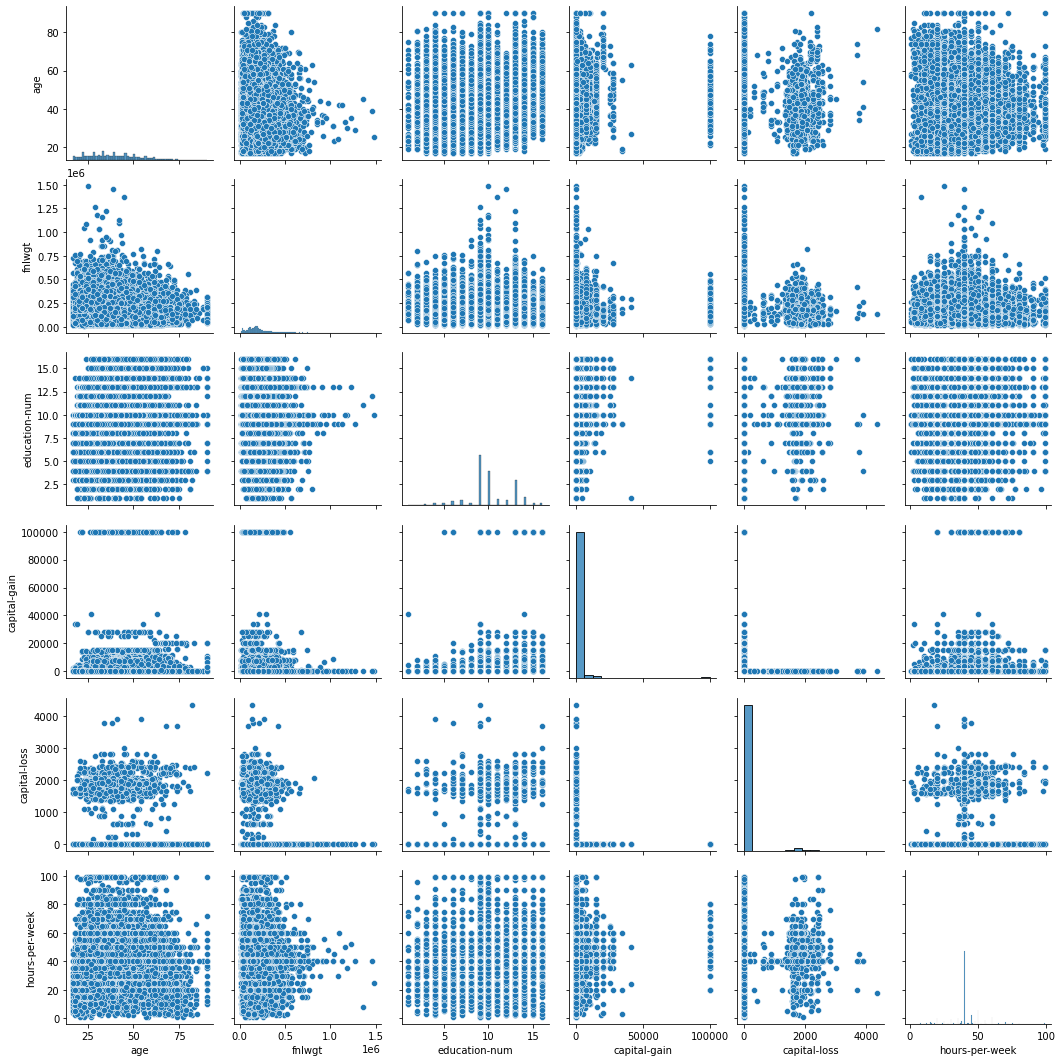

In [29]:
sns.pairplot(df[num_col])

# Checking outliers

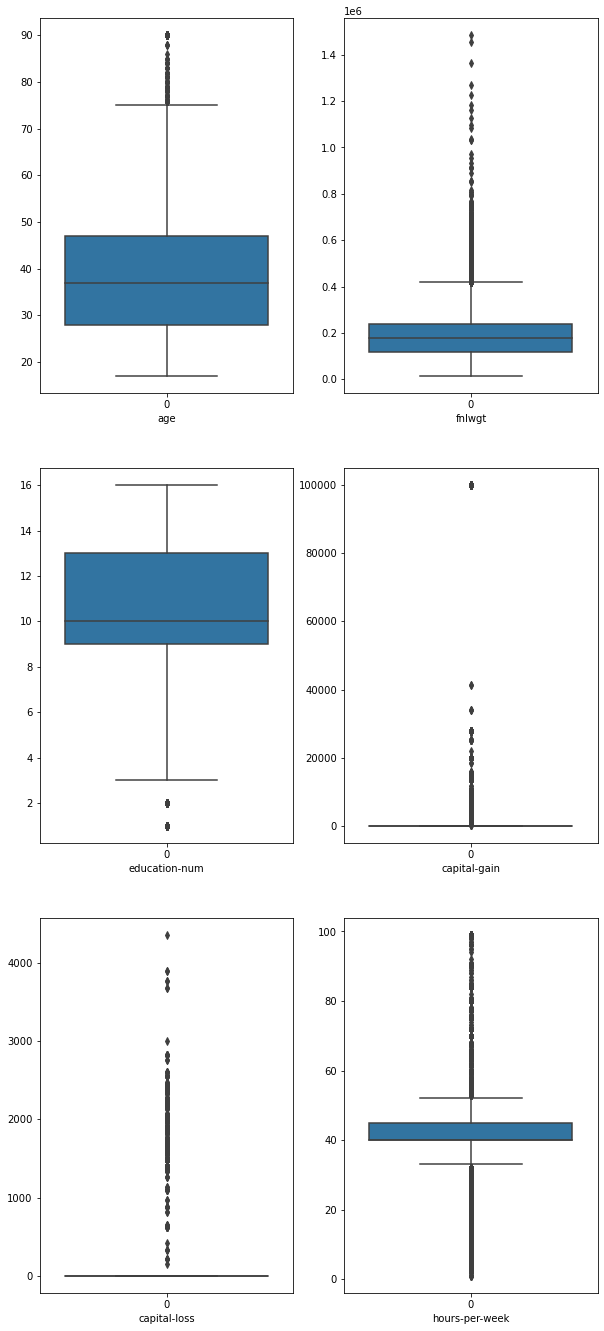

In [30]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df[num_col[i]])
    plt.xlabel(num_col[i])

- so we can see that to many outliers are there so we have to treat them before going to model building

# Treating outliers

In [31]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].mean()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].mean()


In [32]:
replace_with_thresholds(df,num_col)

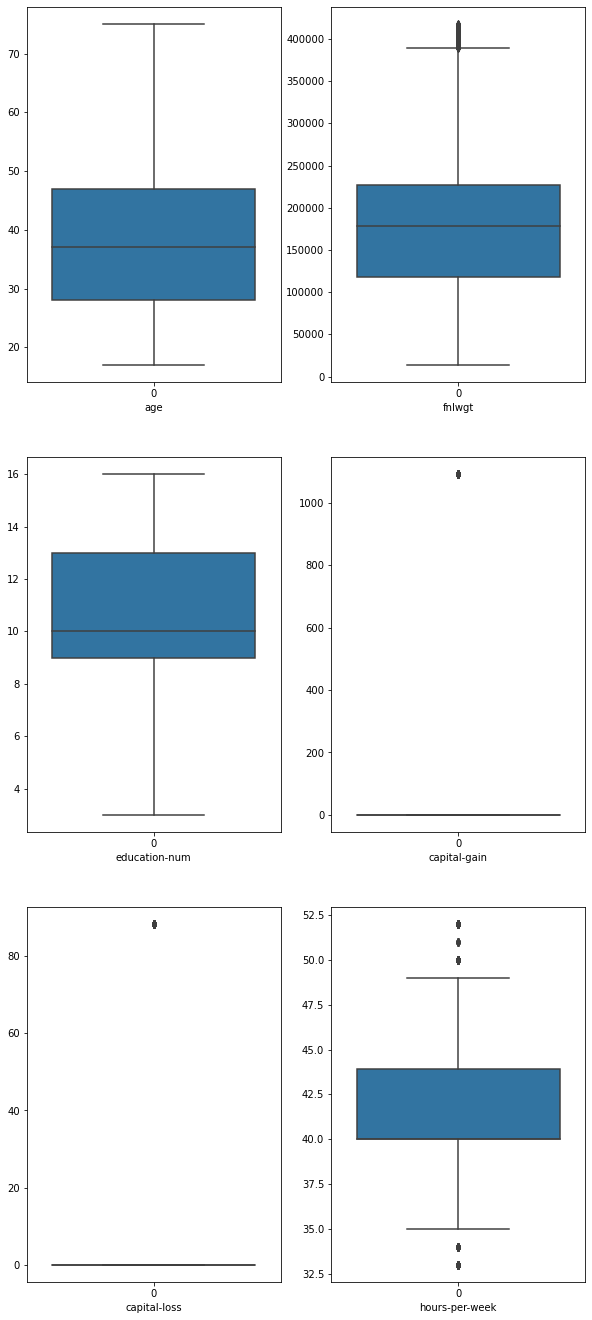

In [33]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df[num_col[i]])
    plt.xlabel(num_col[i])

creating a new copy of dataset(df) and convert it into numerical with the help of labelEncoder

In [34]:
new_df = df.copy()

In [35]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


for i in cat_col:
    new_df[i]= label_encoder.fit_transform(new_df[i])

In [36]:
new_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39.0,5,77516.0,9,13.0,4,0,1,4,1,1092.007858,0.0,40.000000,38,0
1,50.0,4,83311.0,9,13.0,2,3,0,4,1,0.000000,0.0,40.931238,38,0
2,38.0,2,215646.0,11,9.0,0,5,1,4,1,0.000000,0.0,40.000000,38,0
3,53.0,2,234721.0,1,7.0,2,5,0,2,1,0.000000,0.0,40.000000,38,0
4,28.0,2,338409.0,9,13.0,2,9,5,2,0,0.000000,0.0,40.000000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,2,257302.0,7,12.0,2,12,5,4,0,0.000000,0.0,38.000000,38,0
32557,40.0,2,154374.0,11,9.0,2,6,0,4,1,0.000000,0.0,40.000000,38,1
32558,58.0,2,151910.0,11,9.0,6,0,4,4,0,0.000000,0.0,40.000000,38,0
32559,22.0,2,201490.0,11,9.0,4,0,3,4,1,0.000000,0.0,40.931238,38,0


# Now we are good to go for model building

First we will drop some columns which will not use in model

In [37]:
new_df.drop(['fnlwgt','occupation'],axis=1,inplace=True)

In [38]:
new_df.shape

(30162, 13)

Dependent and Independent features

In [39]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

Train test split

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.33)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20208, 12)
(20208,)
(9954, 12)
(9954,)


scaling data

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

## Logistic Regression

In [44]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [45]:
model.score(X_train,y_train)

0.8143804433887569

In [46]:
log_pred = model.predict(X_test)

In [47]:
accuracy_score(y_test,log_pred)

0.8081173397629093

In [48]:
params = dict(penalty=['l1','l2','elasticnet'],C=[1,0.1,0.01,10,100])

In [49]:
best_log_model = RandomizedSearchCV(model,params,random_state=7)
best_log_model.fit(X_train,y_train)

C:\Users\bhupe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bhupe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhupe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\bhupe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1, 0.1, 0.01, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=7)

In [50]:
best_log_model.best_params_

{'penalty': 'l2', 'C': 10}

In [51]:
best_model = LogisticRegression(penalty='l2',C = 10)

In [52]:
best_model.fit(X_train,y_train)

LogisticRegression(C=10)

In [53]:
best_pred = best_model.predict(X_test)

In [54]:
accuracy_score(y_test,best_pred)

0.8081173397629093

# RandomForest Classifier

In [55]:
model = RandomForestClassifier()

In [56]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
model.score(X_train,y_train)

0.9474465558194775

In [58]:
model_pred = model.predict(X_test)

In [59]:
accuracy_score(y_test,model_pred)

0.8162547719509745

In [60]:
params = dict(criterion=['gini', 'entropy', 'log_loss'],max_depth=[1,10,100,5],min_samples_split=[1,2,5,10])

In [61]:
best_ran_model = RandomizedSearchCV(model,params,random_state=7)
best_ran_model.fit(X_train,y_train)

C:\Users\bhupe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bhupe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhupe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\bhupe\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\bhupe\anaconda3\lib\site-packages\jo

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 10, 100, 5],
                                        'min_samples_split': [1, 2, 5, 10]},
                   random_state=7)

In [62]:
best_ran_model.best_params_

{'min_samples_split': 5, 'max_depth': 10, 'criterion': 'entropy'}

In [63]:
best_model = RandomForestClassifier(min_samples_split= 5, max_depth= 10, criterion= 'entropy').fit(X_train,y_train)

In [64]:
best_model.score(X_train,y_train)

0.8516429136975455

In [65]:
best_pred = best_model.predict(X_test)

In [66]:
accuracy_score(y_test,best_pred)

0.8374522804902552

# Naive Bayes

In [69]:
model  = GaussianNB().fit(X_train,y_train)

In [70]:
model.score(X_train,y_train)

0.796714172604909

In [71]:
model_pred = model.predict(X_test)

In [72]:
accuracy_score(y_test,model_pred)

0.7992766726943942

# SVC

In [75]:
svc = SVC().fit(X_train,y_train)

In [76]:
svc.score(X_train,y_train)

0.8396179730799683

In [77]:
svc_pred = svc.predict(X_test)
accuracy_score(y_test,svc_pred)

0.8328310227044404

Hyperparameter Tunning

In [78]:
params = dict(kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],C=[1,10,100,0.1,0.001],gamma=['scale', 'auto'])

In [83]:
Randomsearch_model = RandomizedSearchCV(svc,params,random_state=7,n_jobs=-1)

In [84]:
Randomsearch_model.fit(X_train,y_train)

RandomizedSearchCV(estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 0.1, 0.001],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid', 'precomputed']},
                   random_state=7)

In [86]:
Randomsearch_model.best_params_

{'kernel': 'poly', 'gamma': 'scale', 'C': 1}

In [89]:
best_model = SVC(kernel='poly',gamma='scale',C=1).fit(X_train,y_train)

In [90]:
best_model.score(X_train,y_train)

0.8311559778305622

In [91]:
best_pred = best_model.predict(X_test)

In [92]:
accuracy_score(y_test,best_pred)

0.8229857343781395